In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data=pd.read_csv("C:\\Users\\Dev Atul Patel\\Downloads\\banking.csv")
data.head()

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,01-01-2016,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508750e+13,13230,308262,0.4559
1,04-01-2016,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449370e+14,78529,1360507,0.6818
2,05-01-2016,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836460e+14,109820,1644980,0.7072
3,06-01-2016,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325290e+14,96546,2001431,0.7288
4,07-01-2016,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112060e+14,60151,1172564,0.6586


In [3]:
bank_data = data[data['SYMBOL'] == 'HDFC']

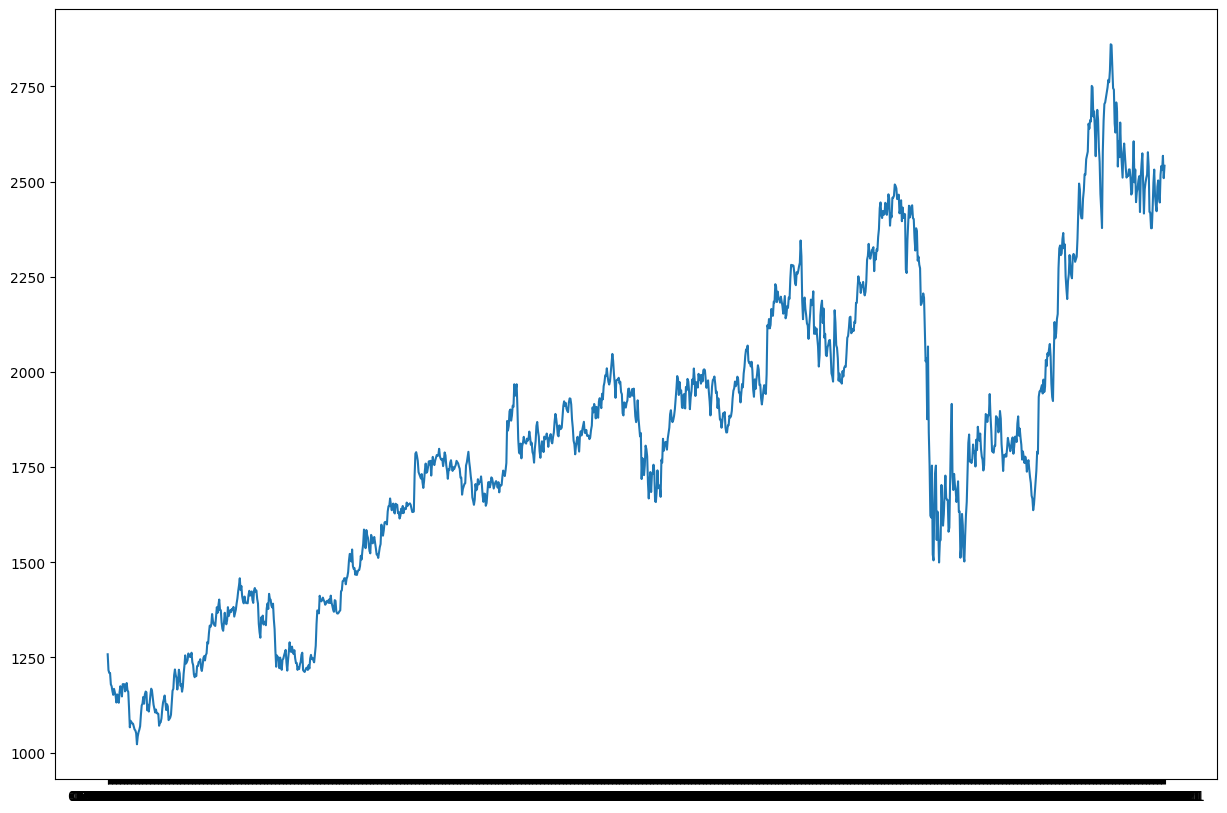

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(bank_data["DATE"], bank_data["CLOSE"])

<Figure size 640x480 with 0 Axes>

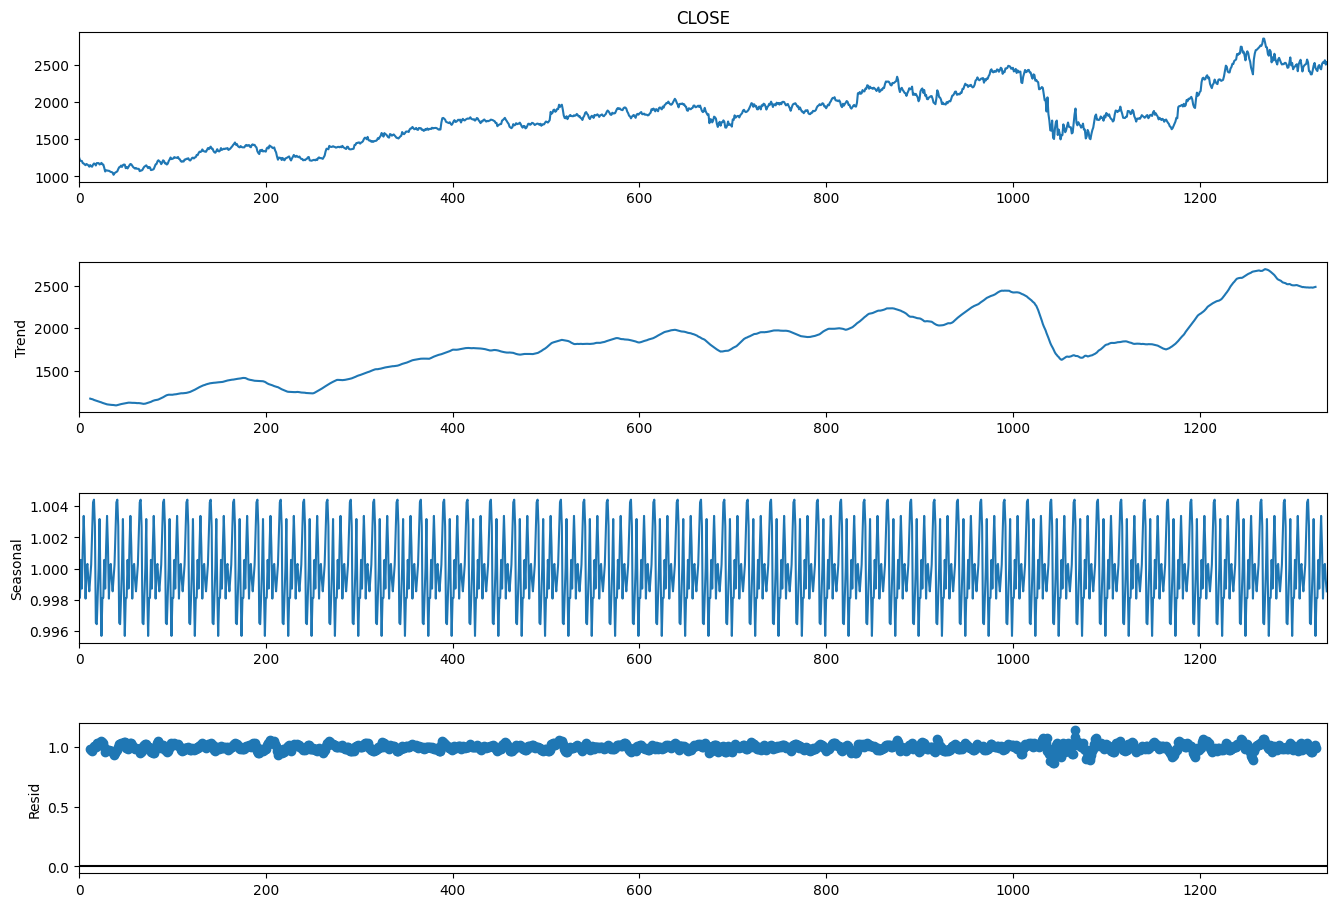

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(bank_data["CLOSE"], 
                            model='multiplicative', period= 25)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

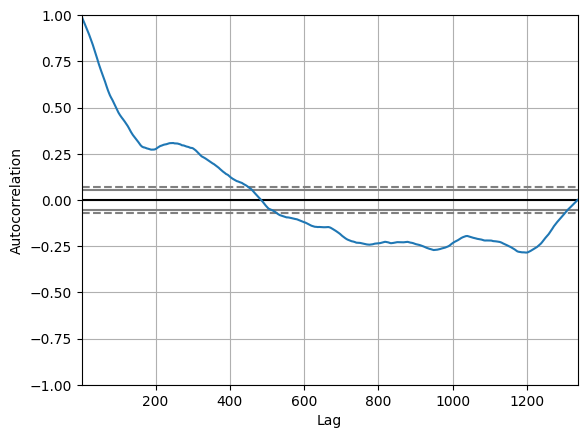

In [7]:
pd.plotting.autocorrelation_plot(bank_data["CLOSE"])

C:\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


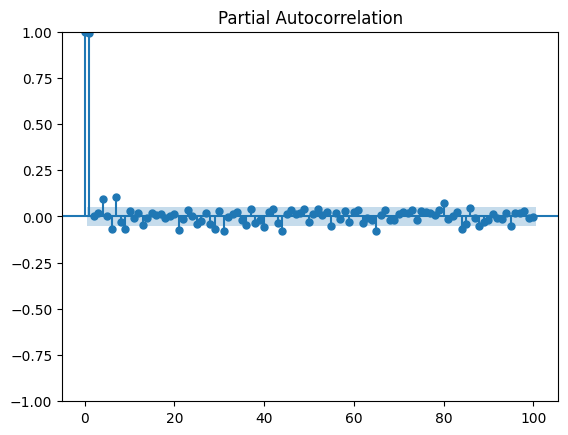

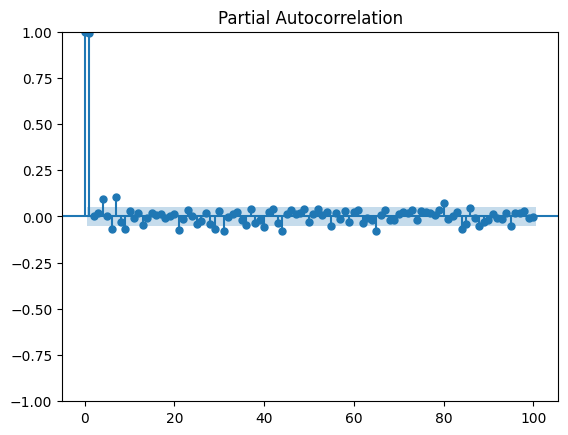

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(bank_data["CLOSE"], lags = 100)

In [22]:
p, d, q = 14, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(bank_data["CLOSE"], order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

C:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  CLOSE   No. Observations:                 1337
Model:                ARIMA(14, 1, 2)   Log Likelihood               -6630.298
Date:                Sat, 01 Apr 2023   AIC                          13294.596
Time:                        18:48:50   BIC                          13382.953
Sample:                             0   HQIC                         13327.703
                               - 1337                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4809      0.030     16.093      0.000       0.422       0.539
ar.L2         -0.9876      0.027    -35.922      0.000      -1.041      -0.934
ar.L3         -0.0961      0.023     -4.124      0.0

In [23]:
pred = fitted.predict(start=len(bank_data), end=len(bank_data)+30)
pred

1337    2538.256743
1338    2537.230807
1339    2540.828430
1340    2529.633330
1341    2540.999085
1342    2543.747049
1343    2544.448599
1344    2539.556447
1345    2527.979884
1346    2543.941027
1347    2545.836466
1348    2546.542537
1349    2536.066940
1350    2532.022149
1351    2543.194410
1352    2547.135027
1353    2543.644455
1354    2535.010330
1355    2534.948571
1356    2544.544737
1357    2546.226301
1358    2541.806648
1359    2534.709897
1360    2537.243311
1361    2544.691403
1362    2545.618035
1363    2540.303840
1364    2535.222608
1365    2538.586889
1366    2544.872559
1367    2544.768067
Name: predicted_mean, dtype: float64

<AxesSubplot: >

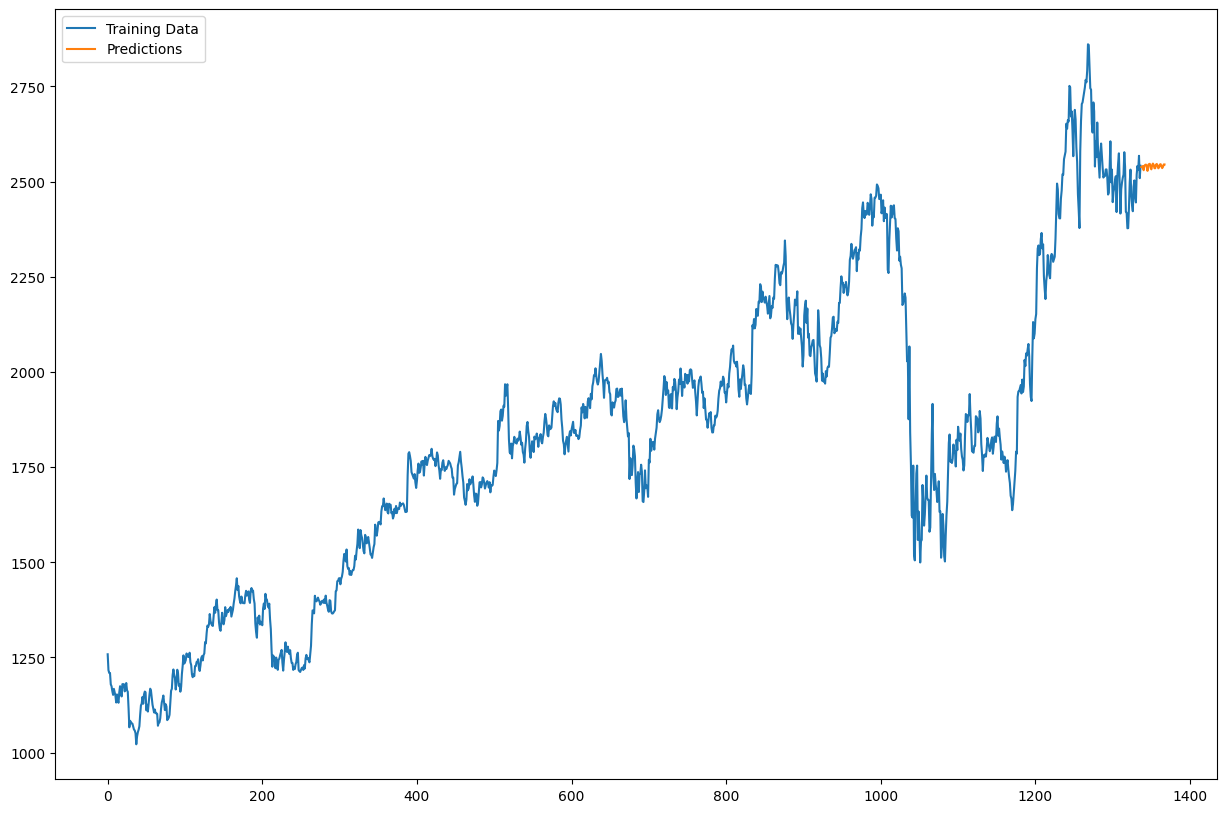

In [24]:
bank_data["CLOSE"].plot(legend=True, label="Training Data", figsize=(15, 10))
pred.plot(legend=True, label="Predictions")